# Checking `organismQuantity` field in OBIS

This notebook uses the entire OBIS database, dumped as a parquet file, to sort and filter out occurrences where the data provider gave an `organismQuantity` and `organismQuantityType`. 

In [1]:
import humanize
import os
import pandas as pd

# file downloaded from https://obis.org/data/access/ on 2022-07-10
file = '../obis_20230208.parquet'
#file = 's3://gbif-open-data-eu-central-1/occurrence/2022-07-01/occurrence.parquet'

 
file_size = humanize.naturalsize(os.path.getsize(file))
print('File Size is:', file_size)

File Size is: 14.1 GB


Try to read using Dask.

In [9]:
# import dask.dataframe as dd

# columns = ['organismQuantity', 'organismQuantityType','decimalLatitude','decimalLongitude']

# #url = 'https://obis-datasets.ams3.digitaloceanspaces.com/exports/obis_20221006.parquet'
# #url = 's3://gbif-open-data-eu-central-1/occurrence/2022-07-01/occurrence.parquet'


# ddf = dd.read_parquet(url, engine="fastparquet", ignore_metadata_file=True, columns=columns)

# ddf

This file is large, so we need to only load in the data we need. So we will pre-select the columns of interest. Then we can read it into memory.

In [10]:
df = pd.read_parquet(file, engine="fastparquet", columns=['blah'])
#df.columns()

ValueError: Following columns were requested but are not available: {'blah'}.
All requested columns: ['blah']
Available columns: ['id', 'dataset_id', 'decimalLongitude', 'decimalLatitude', 'date_start', 'date_mid', 'date_end', 'date_year', 'scientificName', 'originalScientificName', 'minimumDepthInMeters', 'maximumDepthInMeters', 'depth', 'coordinateUncertaintyInMeters', 'flags', 'dropped', 'absence', 'shoredistance', 'bathymetry', 'sst', 'sss', 'marine', 'brackish', 'freshwater', 'terrestrial', 'taxonRank', 'AphiaID', 'redlist_category', 'superdomain', 'domain', 'kingdom', 'subkingdom', 'infrakingdom', 'phylum', 'phylum_division', 'subphylum_subdivision', 'subphylum', 'infraphylum', 'parvphylum', 'gigaclass', 'megaclass', 'superclass', 'class', 'subclass', 'infraclass', 'subterclass', 'superorder', 'order', 'suborder', 'infraorder', 'parvorder', 'superfamily', 'family', 'subfamily', 'supertribe', 'tribe', 'subtribe', 'genus', 'subgenus', 'section', 'subsection', 'series', 'species', 'subspecies', 'natio', 'variety', 'subvariety', 'forma', 'subforma', 'type', 'modified', 'language', 'license', 'rightsHolder', 'accessRights', 'bibliographicCitation', 'references', 'institutionID', 'collectionID', 'datasetID', 'institutionCode', 'collectionCode', 'datasetName', 'ownerInstitutionCode', 'basisOfRecord', 'informationWithheld', 'dataGeneralizations', 'dynamicProperties', 'materialSampleID', 'occurrenceID', 'catalogNumber', 'occurrenceRemarks', 'recordNumber', 'recordedBy', 'recordedByID', 'individualCount', 'organismQuantity', 'organismQuantityType', 'sex', 'lifeStage', 'reproductiveCondition', 'behavior', 'establishmentMeans', 'occurrenceStatus', 'preparations', 'disposition', 'otherCatalogNumbers', 'associatedMedia', 'associatedReferences', 'associatedSequences', 'associatedTaxa', 'organismID', 'organismName', 'organismScope', 'associatedOccurrences', 'associatedOrganisms', 'previousIdentifications', 'organismRemarks', 'eventID', 'parentEventID', 'samplingProtocol', 'sampleSizeValue', 'sampleSizeUnit', 'samplingEffort', 'eventDate', 'eventTime', 'startDayOfYear', 'endDayOfYear', 'year', 'month', 'day', 'verbatimEventDate', 'habitat', 'fieldNumber', 'fieldNotes', 'eventRemarks', 'locationID', 'higherGeographyID', 'higherGeography', 'continent', 'waterBody', 'islandGroup', 'island', 'country', 'countryCode', 'stateProvince', 'county', 'municipality', 'locality', 'verbatimLocality', 'verbatimElevation', 'minimumElevationInMeters', 'maximumElevationInMeters', 'verbatimDepth', 'minimumDistanceAboveSurfaceInMeters', 'maximumDistanceAboveSurfaceInMeters', 'locationAccordingTo', 'locationRemarks', 'verbatimCoordinates', 'verbatimLatitude', 'verbatimLongitude', 'verbatimCoordinateSystem', 'verbatimSRS', 'geodeticDatum', 'coordinatePrecision', 'pointRadiusSpatialFit', 'footprintWKT', 'footprintSRS', 'footprintSpatialFit', 'georeferencedBy', 'georeferencedDate', 'georeferenceProtocol', 'georeferenceSources', 'georeferenceVerificationStatus', 'georeferenceRemarks', 'geologicalContextID', 'earliestEonOrLowestEonothem', 'latestEonOrHighestEonothem', 'earliestEraOrLowestErathem', 'latestEraOrHighestErathem', 'earliestPeriodOrLowestSystem', 'latestPeriodOrHighestSystem', 'earliestEpochOrLowestSeries', 'latestEpochOrHighestSeries', 'earliestAgeOrLowestStage', 'latestAgeOrHighestStage', 'lowestBiostratigraphicZone', 'highestBiostratigraphicZone', 'lithostratigraphicTerms', 'group', 'formation', 'member', 'bed', 'identificationID', 'identifiedBy', 'identifiedByID', 'dateIdentified', 'identificationReferences', 'identificationRemarks', 'identificationQualifier', 'identificationVerificationStatus', 'typeStatus', 'taxonID', 'scientificNameID', 'acceptedNameUsageID', 'parentNameUsageID', 'originalNameUsageID', 'nameAccordingToID', 'namePublishedInID', 'taxonConceptID', 'acceptedNameUsage', 'parentNameUsage', 'originalNameUsage', 'nameAccordingTo', 'namePublishedIn', 'namePublishedInYear', 'higherClassification', 'specificEpithet', 'infraspecificEpithet', 'verbatimTaxonRank', 'scientificNameAuthorship', 'vernacularName', 'nomenclaturalCode', 'taxonomicStatus', 'nomenclaturalStatus', 'taxonRemarks']

In [6]:
cols = ['id', 'dataset_id', 'decimalLongitude', 'decimalLatitude', 'date_start', 'date_mid', 'date_end', 'date_year', 'scientificName', 'originalScientificName', 'minimumDepthInMeters', 'maximumDepthInMeters', 'coordinateUncertaintyInMeters', 'flags', 'dropped', 'absence', 'shoredistance', 'bathymetry', 'sst', 'sss', 'marine', 'brackish', 'freshwater', 'terrestrial', 'taxonRank', 'AphiaID', 'redlist_category', 'superdomain', 'domain', 'kingdom', 'subkingdom', 'infrakingdom', 'phylum', 'phylum_division', 'subphylum_subdivision', 'subphylum', 'infraphylum', 'parvphylum', 'gigaclass', 'megaclass', 'superclass', 'class', 'subclass', 'infraclass', 'subterclass', 'superorder', 'order', 'suborder', 'infraorder', 'parvorder', 'superfamily', 'family', 'subfamily', 'supertribe', 'tribe', 'subtribe', 'genus', 'subgenus', 'section', 'subsection', 'series', 'species', 'subspecies', 'natio', 'variety', 'subvariety', 'forma', 'subforma', 'type', 'modified', 'language', 'license', 'rightsHolder', 'accessRights', 'bibliographicCitation', 'references', 'institutionID', 'collectionID', 'datasetID', 'institutionCode', 'collectionCode', 'datasetName', 'ownerInstitutionCode', 'basisOfRecord', 'informationWithheld', 'dataGeneralizations', 'dynamicProperties', 'materialSampleID', 'occurrenceID', 'catalogNumber', 'occurrenceRemarks', 'recordNumber', 'recordedBy', 'recordedByID', 'individualCount', 'organismQuantity', 'organismQuantityType', 'sex', 'lifeStage', 'reproductiveCondition', 'behavior', 'establishmentMeans', 'occurrenceStatus', 'preparations', 'disposition', 'otherCatalogNumbers', 'associatedMedia', 'associatedReferences', 'associatedSequences', 'associatedTaxa', 'organismID', 'organismName', 'organismScope', 'associatedOccurrences', 'associatedOrganisms', 'previousIdentifications', 'organismRemarks', 'eventID', 'parentEventID', 'samplingProtocol', 'sampleSizeValue', 'sampleSizeUnit', 'samplingEffort', 'eventDate', 'eventTime', 'startDayOfYear', 'endDayOfYear', 'year', 'month', 'day', 'verbatimEventDate', 'habitat', 'fieldNumber', 'fieldNotes', 'eventRemarks', 'locationID', 'higherGeographyID', 'higherGeography', 'continent', 'waterBody', 'islandGroup', 'island', 'country', 'countryCode', 'stateProvince', 'county', 'municipality', 'locality', 'verbatimLocality', 'verbatimElevation', 'minimumElevationInMeters', 'maximumElevationInMeters', 'verbatimDepth', 'minimumDistanceAboveSurfaceInMeters', 'maximumDistanceAboveSurfaceInMeters', 'locationAccordingTo', 'locationRemarks', 'verbatimCoordinates', 'verbatimLatitude', 'verbatimLongitude', 'verbatimCoordinateSystem', 'verbatimSRS', 'geodeticDatum', 'coordinatePrecision', 'pointRadiusSpatialFit', 'footprintWKT', 'footprintSRS', 'footprintSpatialFit', 'georeferencedBy', 'georeferencedDate', 'georeferenceProtocol', 'georeferenceSources', 'georeferenceVerificationStatus', 'georeferenceRemarks', 'geologicalContextID', 'earliestEonOrLowestEonothem', 'latestEonOrHighestEonothem', 'earliestEraOrLowestErathem', 'latestEraOrHighestErathem', 'earliestPeriodOrLowestSystem', 'latestPeriodOrHighestSystem', 'earliestEpochOrLowestSeries', 'latestEpochOrHighestSeries', 'earliestAgeOrLowestStage', 'latestAgeOrHighestStage', 'lowestBiostratigraphicZone', 'highestBiostratigraphicZone', 'lithostratigraphicTerms', 'group', 'formation', 'member', 'bed', 'identificationID', 'identifiedBy', 'identifiedByID', 'dateIdentified', 'identificationReferences', 'identificationRemarks', 'identificationQualifier', 'identificationVerificationStatus', 'typeStatus', 'taxonID', 'scientificNameID', 'acceptedNameUsageID', 'parentNameUsageID', 'originalNameUsageID', 'nameAccordingToID', 'namePublishedInID', 'taxonConceptID', 'acceptedNameUsage', 'parentNameUsage', 'originalNameUsage', 'nameAccordingTo', 'namePublishedIn', 'namePublishedInYear', 'higherClassification', 'specificEpithet', 'infraspecificEpithet', 'verbatimTaxonRank', 'scientificNameAuthorship', 'vernacularName', 'nomenclaturalCode', 'taxonomicStatus', 'nomenclaturalStatus', 'taxonRemarks']

for col in sorted(cols):
    print(col)

AphiaID
absence
acceptedNameUsage
acceptedNameUsageID
accessRights
associatedMedia
associatedOccurrences
associatedOrganisms
associatedReferences
associatedSequences
associatedTaxa
basisOfRecord
bathymetry
bed
behavior
bibliographicCitation
brackish
catalogNumber
class
collectionCode
collectionID
continent
coordinatePrecision
coordinateUncertaintyInMeters
country
countryCode
county
dataGeneralizations
datasetID
datasetName
dataset_id
dateIdentified
date_end
date_mid
date_start
date_year
day
decimalLatitude
decimalLongitude
disposition
domain
dropped
dynamicProperties
earliestAgeOrLowestStage
earliestEonOrLowestEonothem
earliestEpochOrLowestSeries
earliestEraOrLowestErathem
earliestPeriodOrLowestSystem
endDayOfYear
establishmentMeans
eventDate
eventID
eventRemarks
eventTime
family
fieldNotes
fieldNumber
flags
footprintSRS
footprintSpatialFit
footprintWKT
forma
formation
freshwater
genus
geodeticDatum
geologicalContextID
georeferenceProtocol
georeferenceRemarks
georeferenceSources
georef

In [6]:
columns = ['basisOfRecord',]#'organismQuantity', 'organismQuantityType','decimalLatitude','decimalLongitude',]

df = pd.read_parquet(file, engine="fastparquet", columns=columns)

df

,basisOfRecord
0,Occurrence
1,HumanObservation
2,Occurrence
3,Occurrence
4,HumanObservation
...,...
108504416,HumanObservation
108504417,HumanObservation
108504418,HumanObservation
108504419,HumanObservation


Let's check the size of the monster:

In [11]:
nbytes = df.memory_usage(index=True, deep=True)

subset_size = humanize.naturalsize(nbytes.sum())

print('Subset size is:',subset_size)

Subset size is: 5.9 GB


In [7]:
df_filtered = df[df['basisOfRecord'].notna()]

df_filtered.shape

(108504331, 1)

In [8]:
for string in df_filtered['basisOfRecord'].unique().tolist():
    print(string)

Occurrence
HumanObservation
PreservedSpecimen
MaterialSample
MachineObservation
O
preservedSpecimen
LivingSpecimen
FossilSpecimen
S
Human observation
Human Observation
D
NomenclaturalChecklist
Humanobservation
humanobservation
machineobservation
123.25
materialSample
DerivedFromLiterature
123.1833
121.6833
122.2
120.9
119.45
121.2333
122.4333
122.0667
123.45
120.0667
121.8
123.9167
121.4833
121.2
122.5
119.7333
121.4333
117.8833
120.1
118.0667
122.9167
121.1167
122.1
122.85
121.75
119.5833
120.5333
119.25
121.5
121.7167
120.6833
121.6167
118.65
122
123.5833
119.3833
121.4
123
119.1333
119.4667
120.9167
preservedspecimen
120.9667
121.95
120.2333
119.6667
120.65
123.3333
120.75
124
122.4167
humanObservation
121
120.9333
120
Marine Species
121.0667
120.25
119.75
122.9
119.6
118.2
121.35
122.5333
119.8
121.0833
118.8333
121.0333
121.9667
122.25
123.2167
122.7167
122.6
120.6
119.85
122.75
123.5
120.8333
121.25
122.3
121.8333
121.6333
121.2833
122.65
122.15
122.9833
120.5
123.4
123.2333
120.

Okay, let's filter out where `organismQuantityType` or `organismQuantity` don't have values. We need both to exist!

In [5]:
df_filtered = df[(df['organismQuantityType'].notna() | df['organismQuantity'].notna())]

df_filtered.shape

(27292364, 4)

Let's make a map of the points we have for some context.

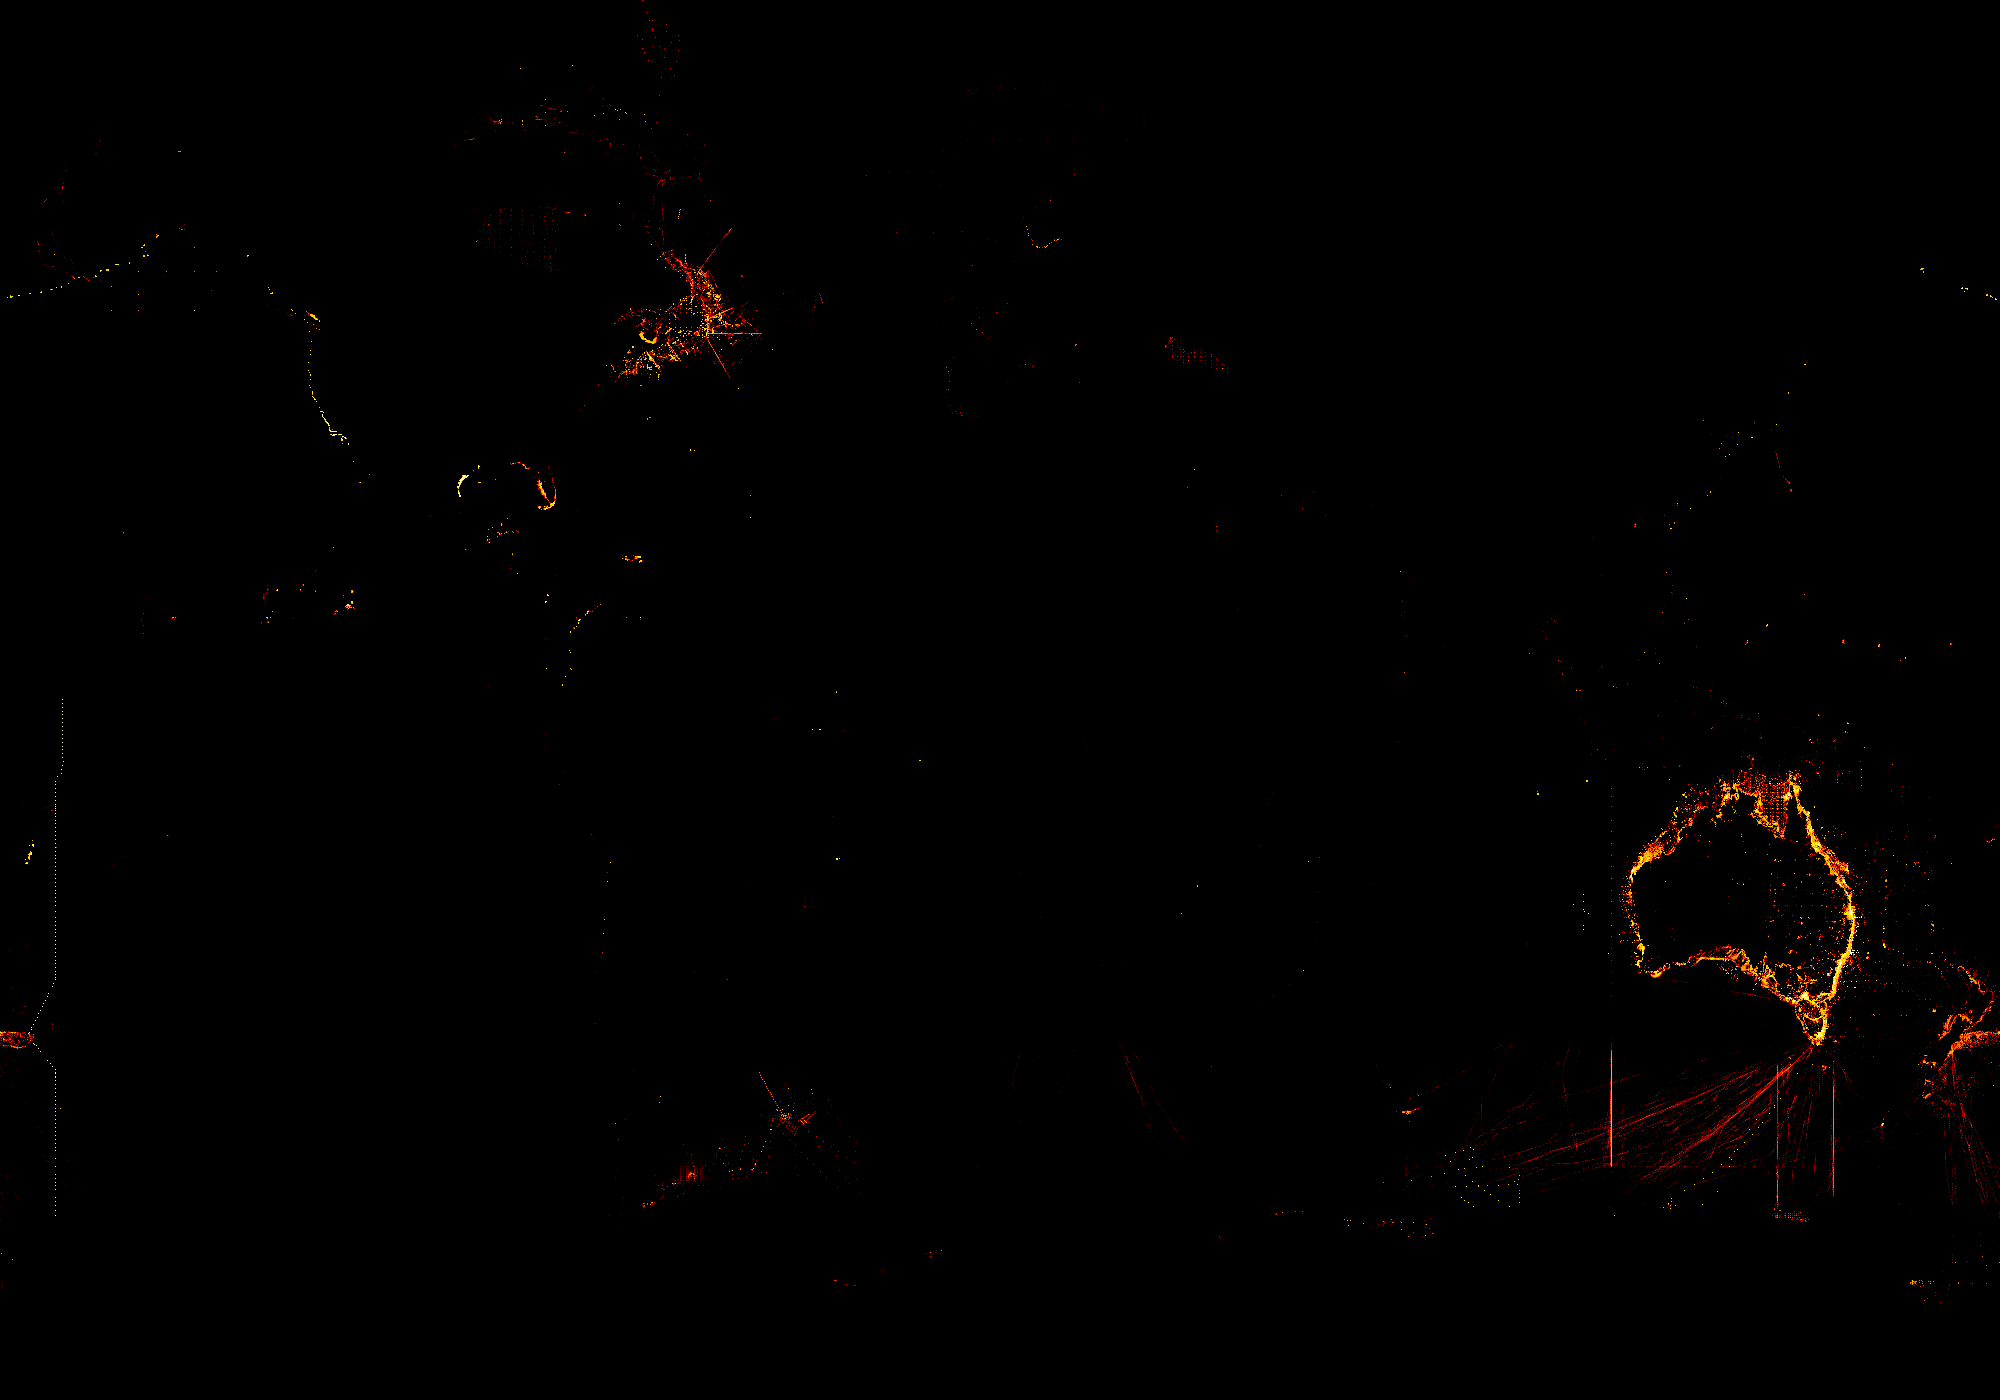

In [6]:
import datashader as ds
import colorcet

cvs = ds.Canvas(plot_width=2000, plot_height=1400)
agg = cvs.points(df_filtered, 'decimalLongitude', 'decimalLatitude')
img = ds.tf.set_background(
            ds.tf.shade(agg, 
                cmap=colorcet.fire, 
                how='eq_hist', 
                rescale_discrete_levels=True,
                ), 
            "black")

img

Let's see what the number of records for each unique `organismQuantityType` looks like:

In [7]:
pd.set_option('display.max_rows', 160)
df_group = df.groupby(by='organismQuantityType').count()

df_group.drop(columns=['decimalLatitude','decimalLongitude'], inplace=True)

df_group.rename(columns={'organismQuantity':'count'}, inplace=True)

df_group.sort_values(by='count', ascending=False)

,count
organismQuantityType,
DNA sequence reads,17099687
individuals,4258861
detections per day,1510107
individual,533275
Relative Abundance,374608
Individuals,211118
number of individuals per 120 m3,153944
Cells per litre,132071
biomass in kilograms (kg),115079


Numbers are nice, but I'm a visual person. Show me a histogram of the number of records for each `organismQuantity` so I can visually see which ones occur the most.

<AxesSubplot: xlabel='organismQuantityType', ylabel='count'>

C:\Users\Mathew.Biddle\programs\Miniforge\envs\globe\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
C:\Users\Mathew.Biddle\programs\Miniforge\envs\globe\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


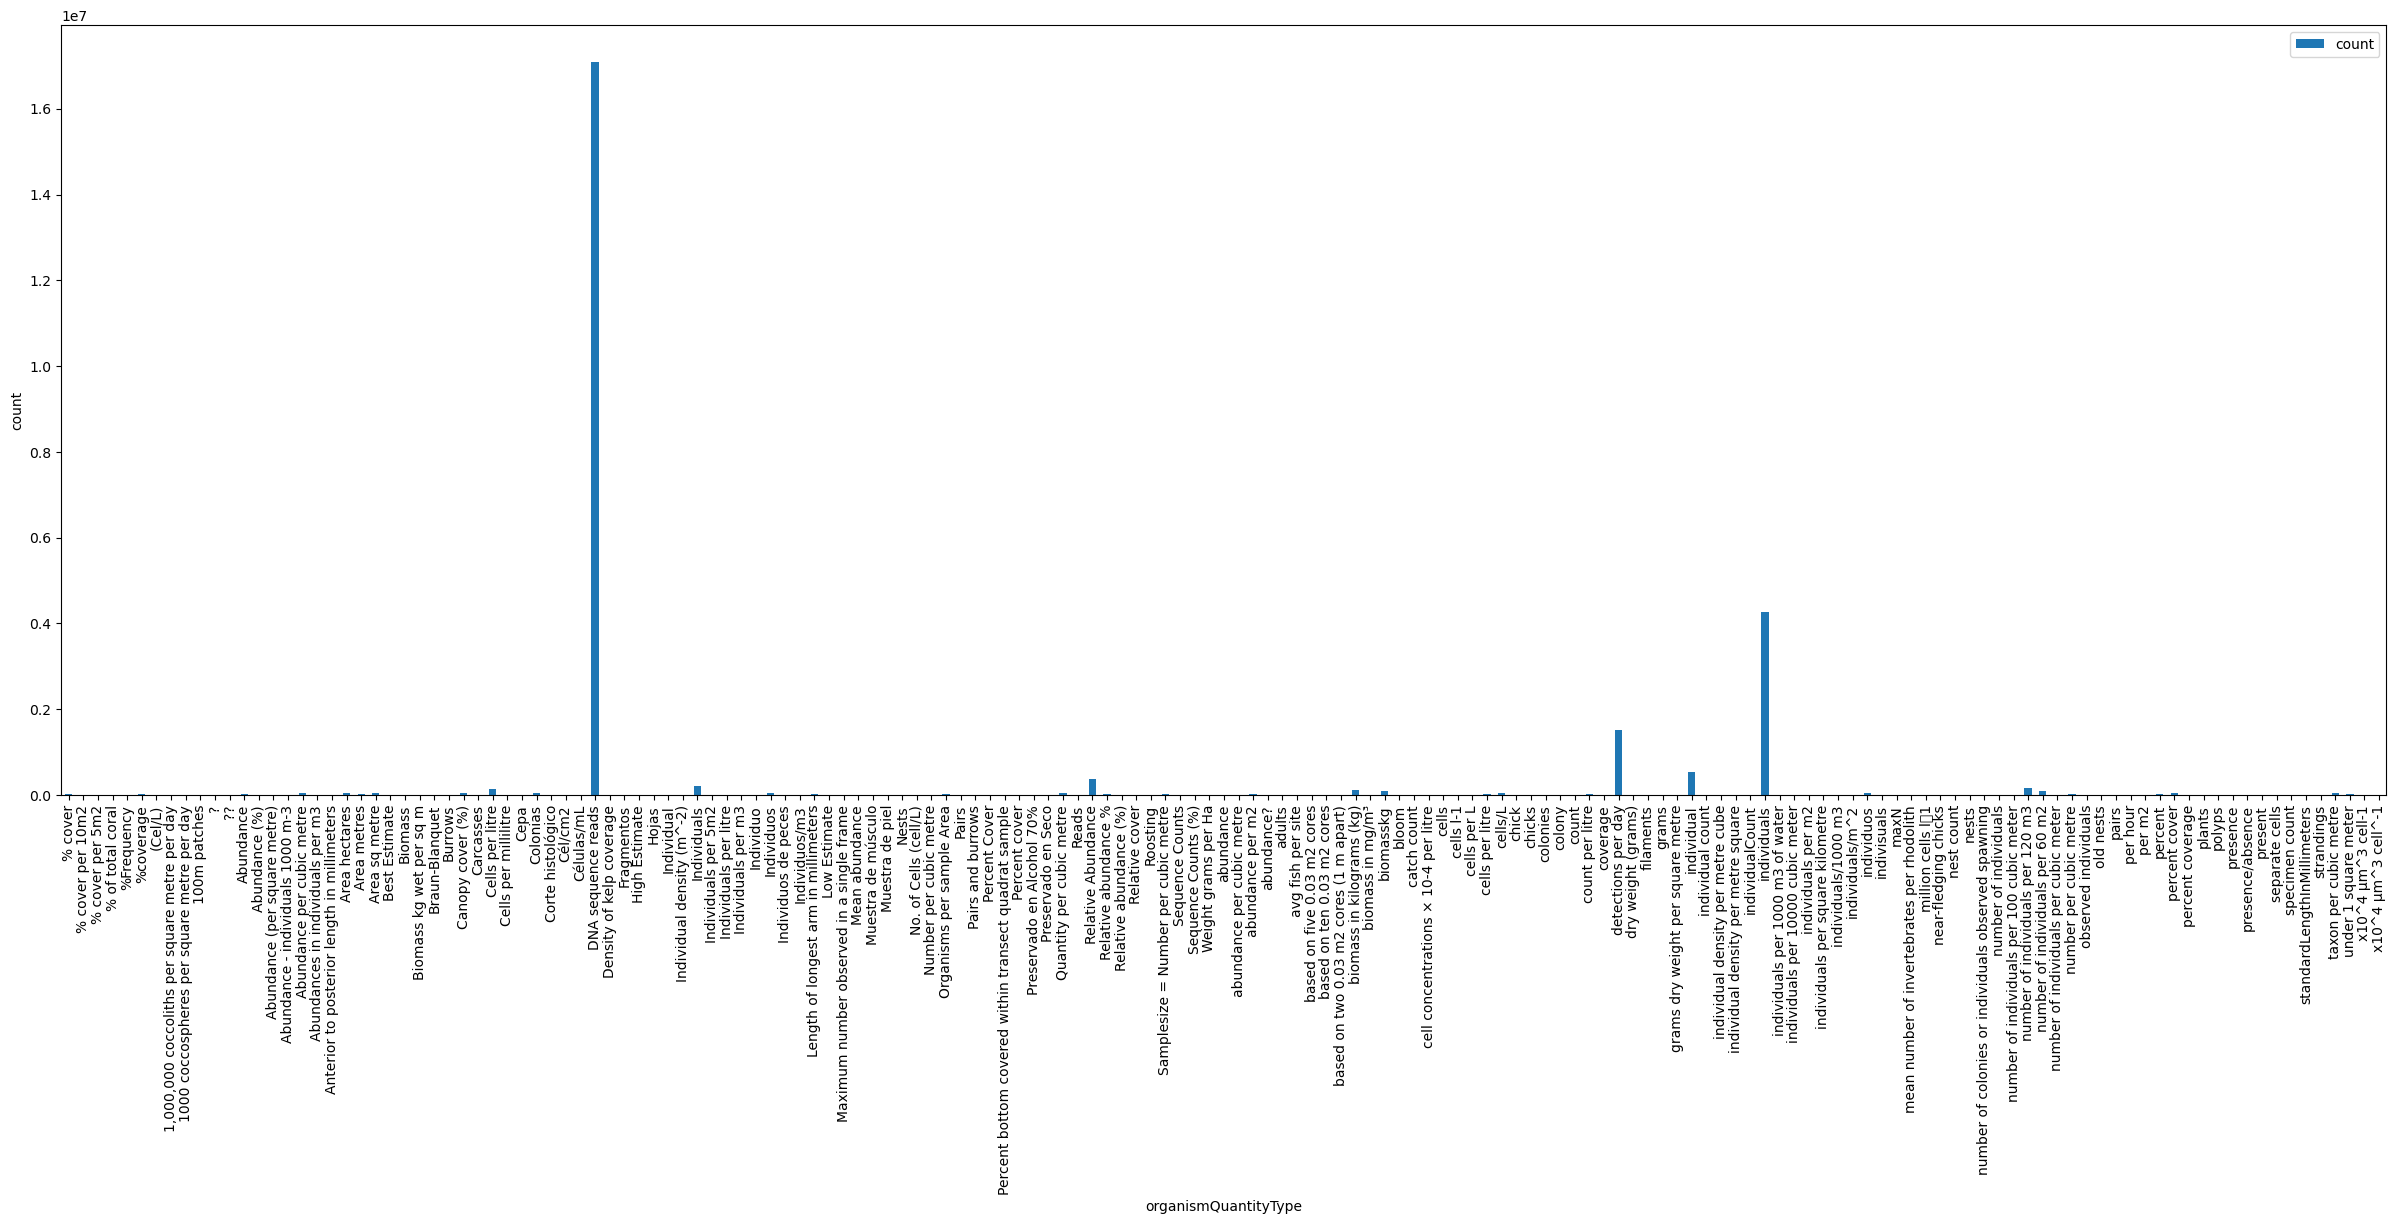

In [8]:
df_group.reset_index(inplace=True)

df_group.plot.bar(x='organismQuantityType',y='count',
                                figsize=(30,10),
                                ylabel='count',
                               )

That's a lot of different `organismQuantityTypes`. How about I pick the top 20 cited ones?

But, first let's remove that top `DNA sequence reads` entry as it totally masks out the other `organismQuantityTypes`.

In [9]:
top_20 = df_group.sort_values(by='count', ascending=False).head(20)['organismQuantityType'].tail(19)


df_top_20 = df_group.loc[df_group['organismQuantityType'].isin(top_20)]

df_top_20.sort_values(by='count', ascending=False)

,organismQuantityType,count
116,individuals,4258861
106,detections per day,1510107
111,individual,533275
70,Relative Abundance,374608
43,Individuals,211118
134,number of individuals per 120 m3,153944
29,Cells per litre,132071
88,biomass in kilograms (kg),115079
135,number of individuals per 60 m2,83765
90,biomasskg,80982


That's a little more manageable. Let's make a histogram of that distribution:

<AxesSubplot: xlabel='organismQuantityType', ylabel='count'>

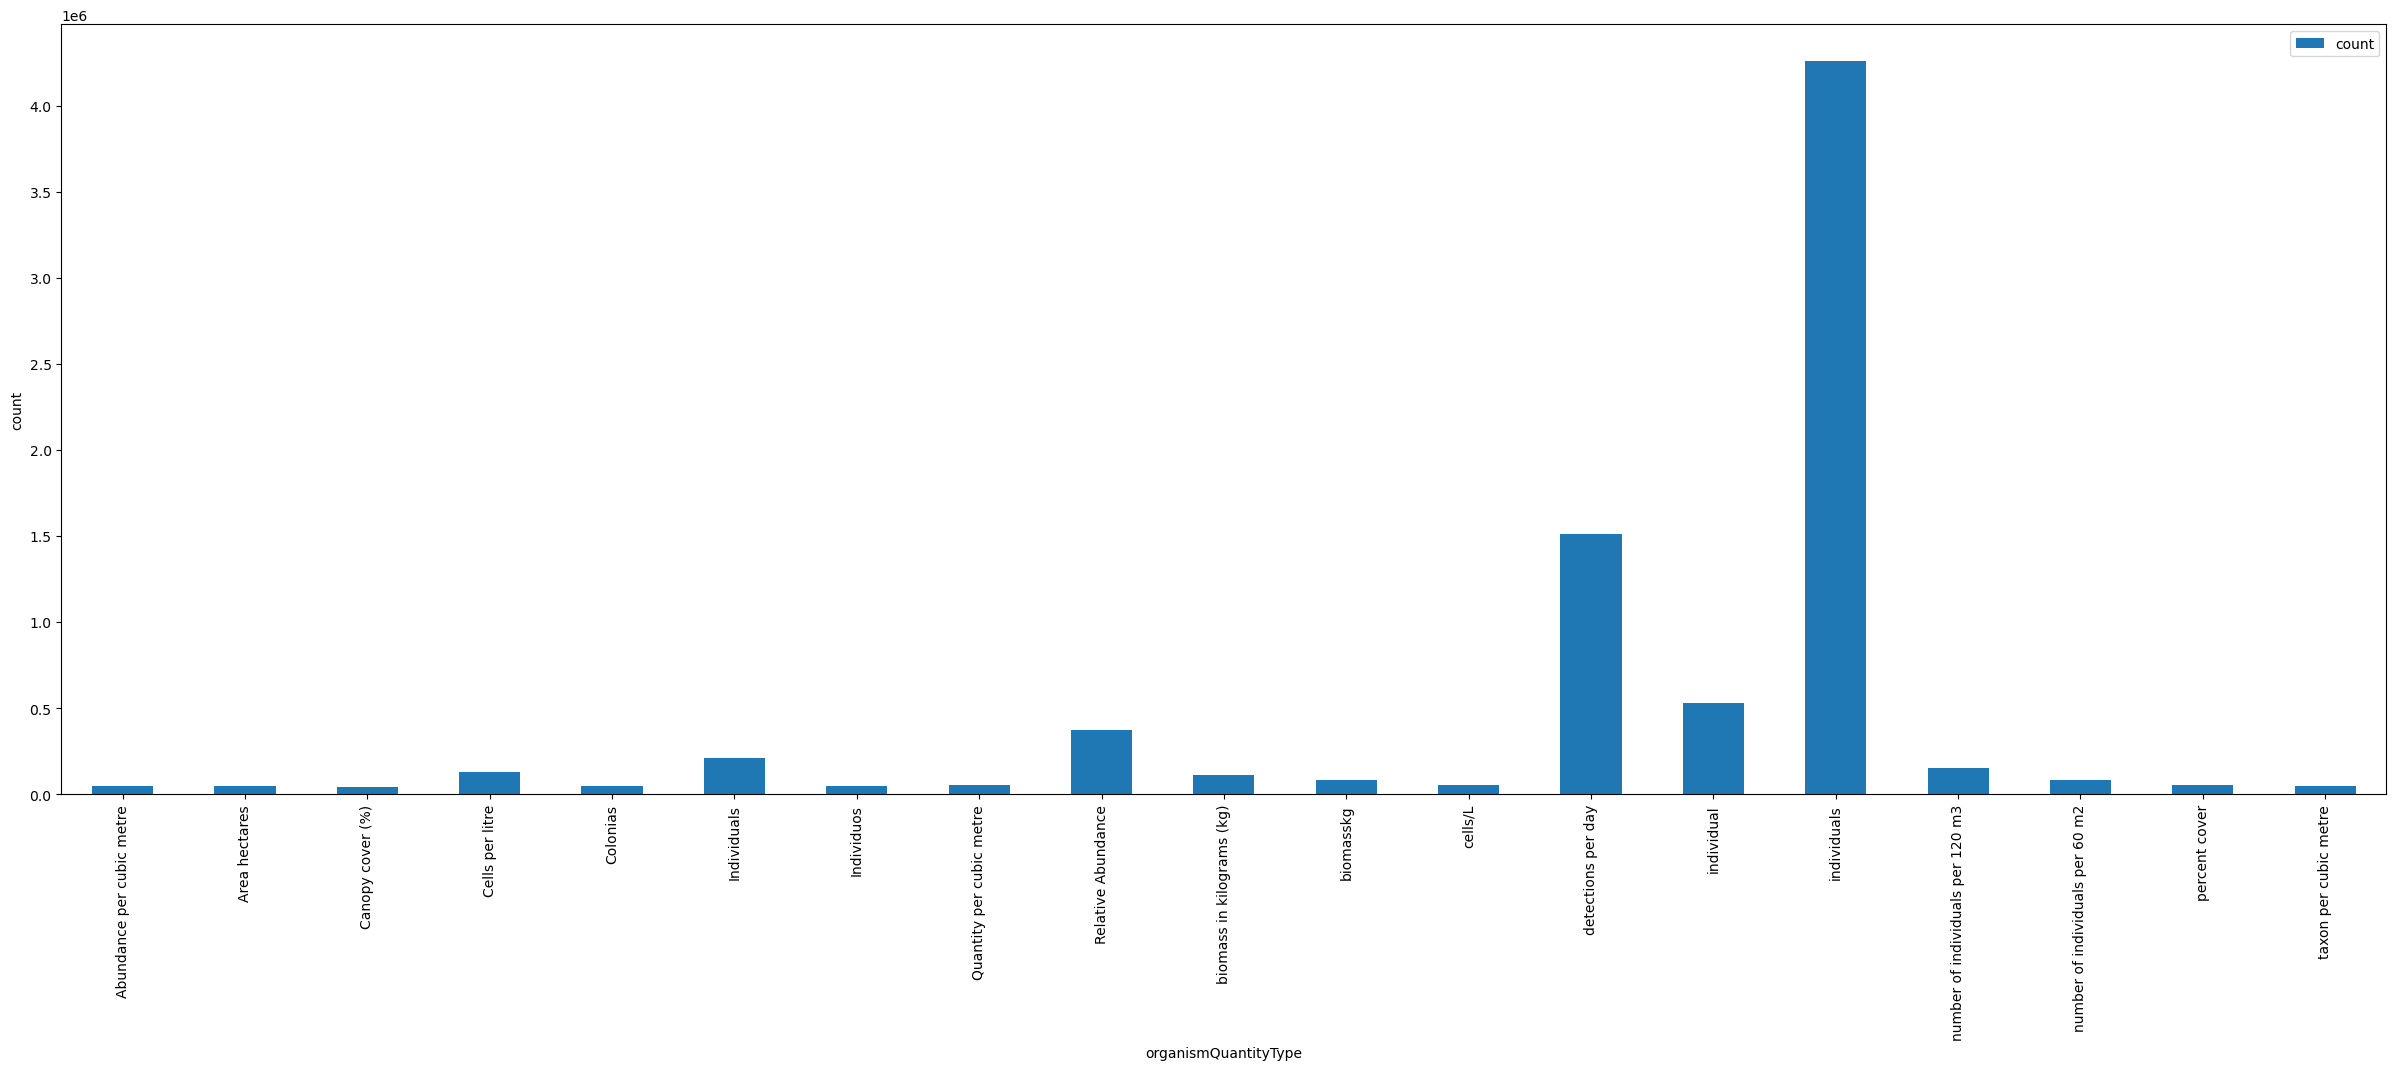

In [10]:
df_top_20.plot.bar(x='organismQuantityType',y='count',
                                figsize=(30,10),
                                ylabel='count',
                               )

It looks like a significant amount of `organismQuantityTypes` are `individuals` (outside of `DNA sequence reads`). 